<img src="./Kleiber-law.jpg" width=800>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [3]:
df=pd.read_excel("./Kleiber-law.xlsx") 
display(df.info(), df.head(), df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CommonName      97 non-null     object 
 1   Species         97 non-null     object 
 2   Mass (kg)       97 non-null     float64
 3   Metab (kJ/day)  97 non-null     float64
 4   Life            97 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.9+ KB


None

,CommonName,Species,Mass (kg),Metab (kJ/day),Life
0,Shrew,Sorex caecutiens,0.00360,15.00,0.8
1,Marsupial,Antechinomus stuartii,0.00365,17.60,2.5
2,Common shrew,Sorex araneus,0.00500,17.60,0.8
3,Marsupial,Antechinomus laniger,0.00850,5.17,2.0
4,Mouse,Microtus minutus,0.00980,18.00,0.8


,CommonName,Species,Mass (kg),Metab (kJ/day),Life
92,Camel,Camelus dromedarius,407.0,23600.0,26.0
93,Buffalo,Bubalus caffer,420.0,29400.0,35.0
94,Bottle-nosed whale,Hyperoodon ampullatus,1000.0,69500.0,40.0
95,Asian elephant,Elephas maximum,3000.0,165000.0,54.0
96,Blue whale,Balaenoptera musculus,150000.0,8360000.0,90.0


In [3]:
# weight vs. energy need (linear scale)
fig = px.scatter(df, x='Mass (kg)', y='Metab (kJ/day)', text='CommonName', title='Weight vs. Energy Need', log_y=False, log_x=False)
fig.update_layout(width=1000, height=600)
fig.show()

Text(0.5, 1.0, 'x,y log scale')

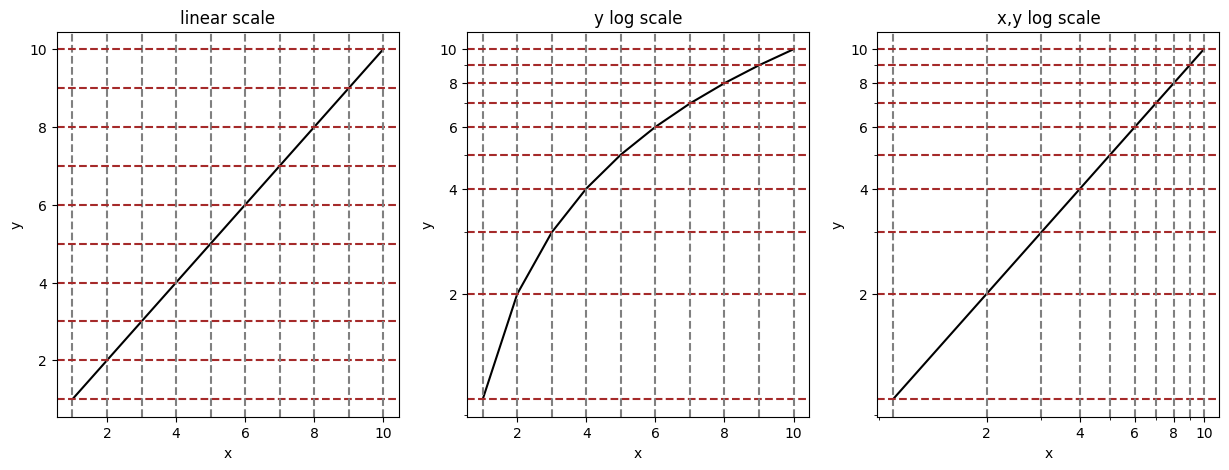

In [4]:
# linear vs log scale
data=pd.DataFrame({'x':np.arange(1,11),'y':np.arange(1,11)})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# linear scale
sns.lineplot(x='x', y='y', data=data, ax=axes[0], color='black')
for i in np.arange(1,11):
    axes[0].axvline(x=i, color='gray', linestyle='dashed')
    axes[0].axhline(y=i, color='brown', linestyle='dashed')
axes[0].set_title("linear scale")

# y log scale
sns.lineplot(x='x', y='y', data=data, ax=axes[1], color='black')
for i in np.arange(1,11):
    axes[1].axvline(x=i, color='gray', linestyle='dashed')
    axes[1].axhline(y=i, color='brown', linestyle='dashed')
axes[1].set_yscale('log')
axes[1].set_yticks(np.arange(2,12,2))
axes[1].set_yticklabels(np.arange(2,12,2))
axes[1].set_title("y log scale")

# both x,y log scale
sns.lineplot(x='x', y='y', data=data, ax=axes[2], color='black')
for i in np.arange(1,11):
    axes[2].axvline(x=i, color='gray', linestyle='dashed')
    axes[2].axhline(y=i, color='brown', linestyle='dashed')
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_xticks(np.arange(2,12,2))
axes[2].set_xticklabels(np.arange(2,12,2))
axes[2].set_yticks(np.arange(2,12,2))
axes[2].set_yticklabels(np.arange(2,12,2))
axes[2].set_title("x,y log scale")

In [5]:
# weight vs. energy need (linear scale)
fig = px.scatter(df, x='Mass (kg)', y='Metab (kJ/day)', text='CommonName', title='Weight vs. Energy Need', log_y=True, log_x=True)
fig.update_layout(width=1000, height=600)
fig.show()

In [6]:
#log-transformation (e.g. log(1000)=3 and log(0.01)=-2)
df['log-weight']=np.log10(df['Mass (kg)'])
df['log-energy need']=np.log10(df['Metab (kJ/day)'])
df.describe()

,Mass (kg),Metab (kJ/day),Life,log-weight,log-energy need
count,97.000000,9.700000e+01,97.000000,97.000000,97.000000
mean,1615.608642,9.136579e+04,13.232990,0.194310,2.600127
std,15226.581054,8.485062e+05,14.993399,1.489742,1.143184
min,0.003600,5.170000e+00,0.800000,-2.443697,0.713491
25%,0.109000,4.070000e+01,3.500000,-0.962574,1.609594
50%,2.300000,3.310000e+02,9.000000,0.361728,2.519828
75%,14.000000,2.200000e+03,16.000000,1.146128,3.342423
max,150000.000000,8.360000e+06,90.000000,5.176091,6.922206


In [7]:
#visualize weight vs. energy need

fig = px.scatter(df, x='log-weight', y='log-energy need', text='CommonName', title='Weight vs. Energy Need')
fig.update_layout(width=1000, height=600)
fig.show()

In [8]:
#Kleiber's law: log-log regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

X = df['log-weight'].values.reshape(-1, 1)
y = df['log-energy need']

# fit linear regression model
model = LinearRegression()
display(model)
model.fit(X, y)

#y=mx+b
b = model.intercept_ # bias
m = model.coef_[0] # slope: by the Kleiber's law, the slope should be 0.75
print(f'y = {m:.4f}x + {b:.4f}')

hunt= np.linspace(df['log-weight'].min(), df['log-weight'].max(), 100).reshape(-1, 1)
predictions = model.predict(hunt)
fig = px.scatter(df, x='log-weight', y='log-energy need', text='CommonName', title='Weight vs. Energy Need with Regression Line')
fig.add_traces(px.line(x=hunt.flatten(), y=predictions.flatten(), labels={'x':'log-weight', 'y':'log-energy need'}).data)
fig.update_layout(width=1000, height=600)
fig.show()

# human base metabolism (calories/day   = kJ/day * 0.25)
model.predict([[np.log10(65)]])  #predict energy need for 65 kg human
np.power(10, model.predict([[np.log10(65)]])) * .25 #inverse log-transformation

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


y = 0.7549x + 2.4534


array([1659.47122254])

NN model for Kleiber's law

c:\Users\m.dipaolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "kleiber-nn-model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

Creating visualization for model: kleiber-nn-model
Processing input layer...
Processing layer 0: Dense
Processing layer 1: Dense
Processing layer 2: Dense
Visualization saved as 'kleiber-nn-model.png'


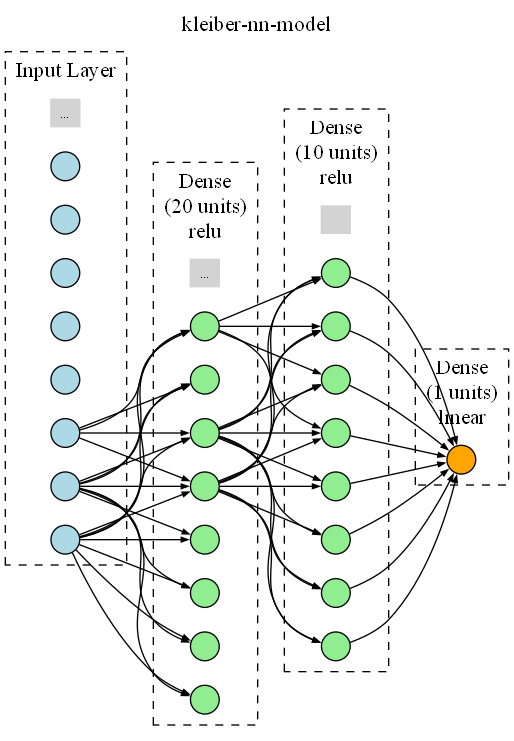

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.7448 - mae: 1.0480
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.6814 - mae: 1.0267
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.6169 - mae: 1.0052
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.5580 - mae: 0.9846
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.5020 - mae: 0.9641
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.4490 - mae: 0.9447
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.3972 - mae: 0.9255
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.3476 - mae: 0.9068
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.2999 - mae: 0.8888
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.2547 - mae: 0.8718
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.2106 - mae: 0.8541
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.1698 - mae: 0.8377
Epoch 13/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/ste

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from utils import display_nn_graph

# Create a more complex neural network
kleiber_nn_model = Sequential([
    Dense(20, activation='relu', input_dim=1, name='hidden_layer_1'),
    Dense(10, activation='relu', name='hidden_layer_2'),
    Dense(1, activation='linear', name='output_layer')
],name='kleiber-nn-model')

kleiber_nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
kleiber_nn_model.summary()
display_nn_graph(kleiber_nn_model, filename='kleiber-nn-model')

X_train, X_test, y_train, y_test = train_test_split(
    df['log-weight'].values.reshape(-1, 1),
    df['log-energy need'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=42
)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)
hunt_scaled = scaler_X.transform(hunt)

# Train the model
history_complex = kleiber_nn_model.fit(
    X_train_scaled, y_train_scaled,
    epochs=200,
    #batch_size=8,
    #validation_split=0.2,
    verbose=1
)

# Evaluate
test_loss_complex, test_mae_complex = kleiber_nn_model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"\n📊 Complex Model Performance:")
print(f"Test Loss (MSE): {test_loss_complex:.4f}")
print(f"Test MAE: {test_mae_complex:.4f}")

# Make predictions
complex_nn_predictions_scaled = kleiber_nn_model.predict(hunt_scaled, verbose=0)
complex_nn_predictions = scaler_y.inverse_transform(complex_nn_predictions_scaled)

# Compare methods
fig = px.scatter(df, x='log-weight', y='log-energy need', text='CommonName', 
                 title='Kleiber\'s Law: Comparing Different Models')

# Linear Regression
fig.add_traces(px.line(x=hunt.flatten(), y=predictions.flatten()).data)
fig.data[-1].name = 'Linear Regression'
fig.data[-1].line.color = 'red'
fig.data[-1].line.width = 2

# Complex Neural Network
fig.add_traces(px.line(x=hunt.flatten(), y=complex_nn_predictions.flatten()).data)
fig.data[-1].name = 'Complex NN (10-5-1)'
fig.data[-1].line.color = 'green'
fig.data[-1].line.width = 2
fig.data[-1].line.dash = 'dot'

fig.update_layout(width=1000, height=600, showlegend=True)
fig.show()

In [10]:
# Predict human base metabolism comparison
human_weight = df.loc[df['CommonName'] == 'Man', 'Mass (kg)'].values[0]
human_weight_log = np.log10(human_weight)
human_weight_scaled = scaler_X.transform([[human_weight_log]])
nn_prediction_scaled = kleiber_nn_model.predict(human_weight_scaled, verbose=0)
nn_prediction_log = scaler_y.inverse_transform(nn_prediction_scaled)[0][0]
nn_prediction_kj = np.power(10, nn_prediction_log)
nn_prediction_cal = nn_prediction_kj * 0.25

print(f"🧑 Human Base Metabolism Prediction ({human_weight} kg):")
lr_pred = np.power(10, model.predict([[human_weight_log]]))[0] * 0.25
print(f"  Linear Regression: {lr_pred:.2f} calories/day")
print(f"  Neural Network:    {nn_prediction_cal:.2f} calories/day")
# compare predictions with value from dataset
true_value_kj = df.loc[df['CommonName'] == 'Man', 'Metab (kJ/day)'].values[0]
true_value_cal = true_value_kj * 0.25
print(f"  True Value:       {true_value_cal:.2f} calories/day")

🧑 Human Base Metabolism Prediction (65.0 kg):
  Linear Regression: 1659.47 calories/day
  Neural Network:    1946.32 calories/day
  True Value:       1890.00 calories/day
